(array([762.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 610.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

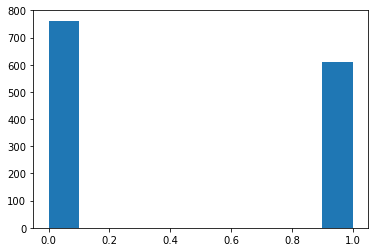

In [1]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt

bank = pd.read_csv("BankNote_Authentication.csv")
plt.hist(bank["class"]) 

We are using a data to classificate the authentification of a bank note by some characteristics in their moevements. As we can see the data is relatively balanced so we are gonna go from here to show the results

In [2]:
X = bank.drop("class", axis = 1)
y = bank["class"]

In [39]:
bank.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression,LinearRegression

scaler = StandardScaler()
scaler.fit(X)
x = scaler.transform(X)
x = x[:,0:1]

model = LinearRegression(fit_intercept=True)
model.fit(x,y)


LinearRegression()

In [4]:
a = model.coef_[0]
b = model.predict(np.zeros((1,1)))

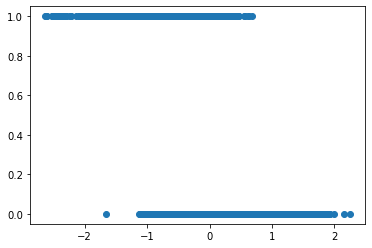

In [5]:
plt.scatter(x, y, label = "DATASET")

# IS NOT A PROBABILITY !

Text(0, 0.5, 'Class')

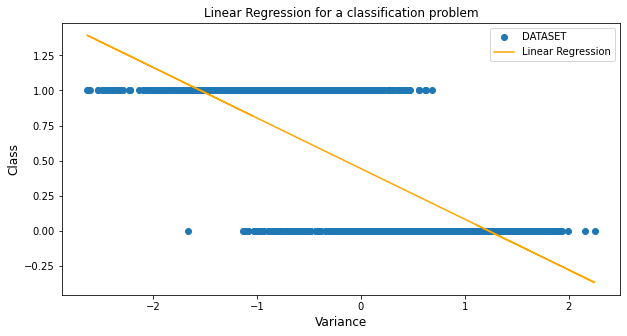

In [6]:
plt.figure(figsize = (10,5))

plt.scatter(x, y, label = "DATASET")
plt.plot(x, a*x + b, color = 'orange', label = "Linear Regression")
plt.legend()
plt.title("Linear Regression for a classification problem", fontsize = 12)
plt.xlabel("Variance", fontsize = 12)
plt.ylabel("Class", fontsize = 12)

Text(0.5, 1.0, 'Sigmoid Function')

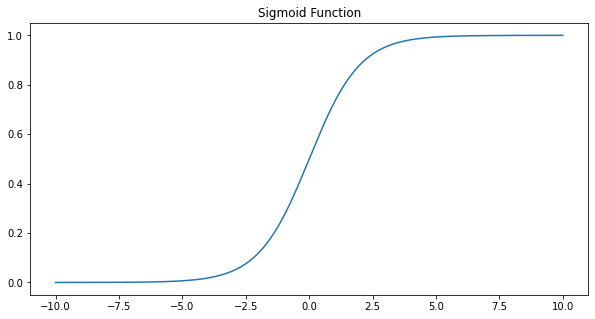

In [17]:
#sigmoid

def sigmoid(x):
    return 1/(1+ np.exp(-x))
plt.figure(figsize = (10,5))
plt.plot(np.linspace(-10,10, 1000) ,sigmoid(np.linspace(-10,10, 1000)))
plt.title("Sigmoid Function")


# Example

In [13]:
logi = LogisticRegression(C = 1, penalty = "none")
logi.fit(x, y)

LogisticRegression(C=1, penalty='none')

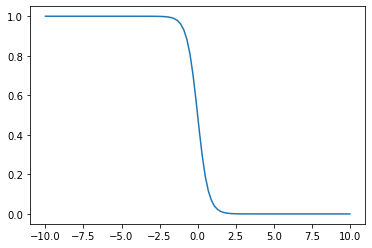

In [27]:
plt.plot(np.linspace(-10,10,100),sigmoid(np.linspace(-10,10,100)*logi.coef_)[0])
plt.show()

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.1, random_state = 42)

scaler = StandardScaler()
scaler.fit(X_train)
x_train = scaler.transform(X_train)
x_test = scaler.transform(X_test)

model = LogisticRegression(C = 1, penalty = "none")
model.fit(X_train,y_train)

pd.DataFrame(model.coef_, columns = X.columns, index = ["coefficients"]).T

,coefficients
variance,-7.566410
skewness,-4.109643
curtosis,-5.153584
entropy,-0.648051


In [38]:
pd.DataFrame(model.predict_proba(x_test), index = [f"dato {k+1}" for k in range(len(x_test))])

/Users/gulloa/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


,0,1
dato 1,3.946008e-02,0.960540
dato 2,3.107227e-05,0.999969
dato 3,1.016004e-04,0.999898
dato 4,6.997637e-03,0.993002
dato 5,1.025876e-01,0.897412
...,...,...
dato 134,8.160456e-01,0.183954
dato 135,4.357612e-01,0.564239
dato 136,6.018400e-01,0.398160
dato 137,6.565875e-08,1.000000


/Users/gulloa/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


Text(0.5, 1.0, 'Predicted data')

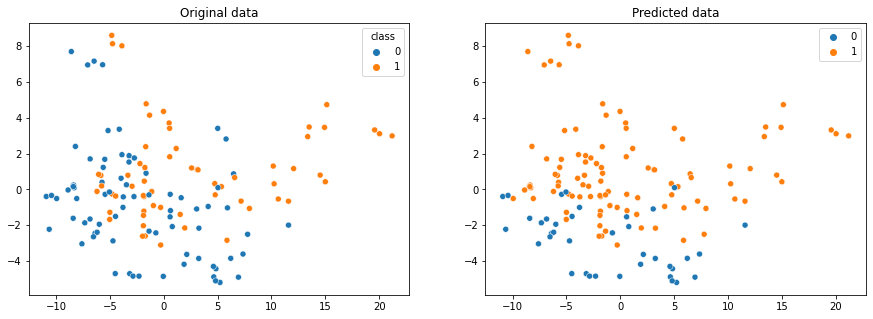

In [57]:
from sklearn.decomposition import PCA,IncrementalPCA, TruncatedSVD, MiniBatchNMF, NMF

dim_red = PCA(n_components=2)
dim_red.fit(X_test)
red = dim_red.transform(X_test)


_, axx = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))
sn.scatterplot(x = red[:,0], y = red[:,1], hue = y_test, ax = axx[0])
sn.scatterplot(x = red[:,0], y = red[:,1], hue = model.predict(x_test), ax = axx[1])
axx[0].set_title("Original data")
axx[1].set_title("Predicted data")

In [59]:
from sklearn.metrics import classification_report

print(classification_report(y_test, model.predict(x_test)))

              precision    recall  f1-score   support

           0       1.00      0.49      0.66        77
           1       0.61      1.00      0.76        61

    accuracy                           0.72       138
   macro avg       0.80      0.75      0.71       138
weighted avg       0.83      0.72      0.70       138



/Users/gulloa/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
